# Task 2: Exploratory Data Analysis

In [1]:
import sys
sys.path.append("..")
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from src.analysis_tools import *



#### load the processed data from task-1

In [2]:
df = pd.read_csv('../data/processed/ethiopia_fi_enriched.csv')
df['observation_date'] = pd.to_datetime(df['observation_date'], format='mixed')
df['year'] = df['observation_date'].dt.year
print("Data loaded. Ready for Analysis.")

Data loaded. Ready for Analysis.


### dataset summary

In [3]:
print(get_dataset_summary(df))

pillar       ACCESS  AFFORDABILITY  Access  GENDER  USAGE
record_type                                              
impact_link       0              0       1       0      0
observation      14              1       1       4     11
target            2              0       0       1      0


data quality plot

C:\Users\arwa\AppData\Local\Temp\ipykernel_12720\2180226179.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='confidence', palette='viridis')


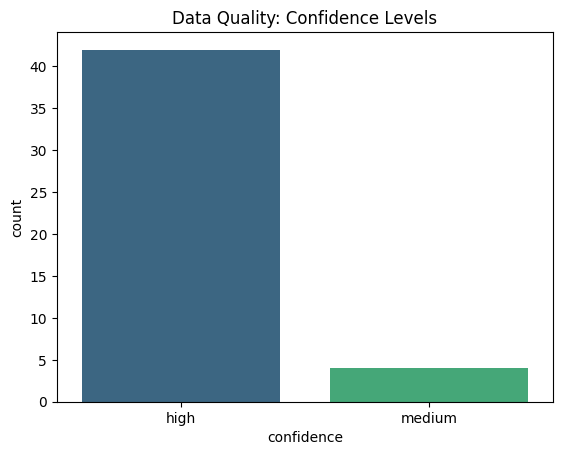

In [4]:
sns.countplot(data=df, x='confidence', palette='viridis')
plt.title("Data Quality: Confidence Levels")
plt.show()

indicators

In [5]:
indicator_counts = df[df['record_type']=='observation']['indicator'].value_counts()
print("\n--- Indicators with Least Data (Gaps) ---")
print(indicator_counts.tail(5))


--- Indicators with Least Data (Gaps) ---
indicator
Mobile Money Activity Rate           1
Data Affordability Index             1
Female Mobile Money Account Share    1
Mobile Phone Gender Gap              1
Account ownership (% of adults)      1
Name: count, dtype: int64


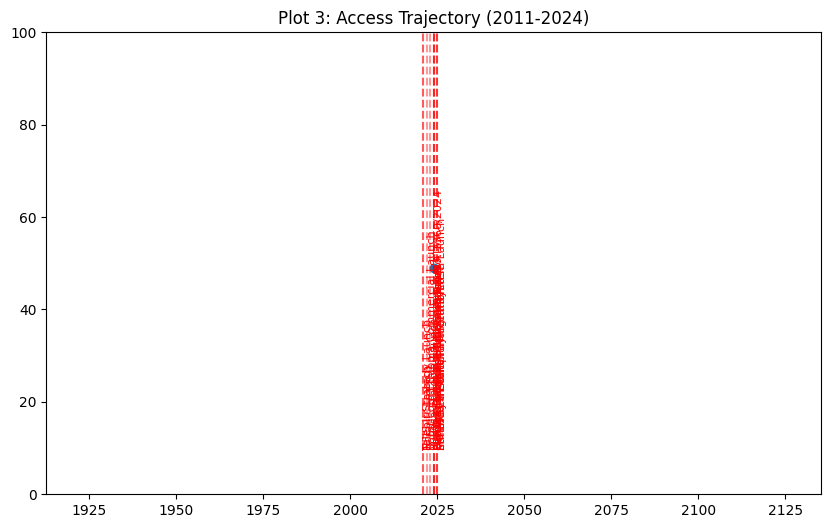


--- Growth Analysis (2021-2024) ---
      year  value_numeric
43  2024.0           49.0


In [6]:
plot_access_trajectory(df)
events = df[df['record_type'] == 'event']
for i, row in events.iterrows():
    plt.axvline(x=row['year'], color='red', linestyle='--', alpha=0.4)
    plt.text(row['year'], 10, row['indicator'], rotation=90, color='red', fontsize=8)

plt.show()

findex_years = [2021, 2024]
growth_df = df[(df['indicator_code'] == 'ACC_OWN_TOT') & (df['year'].isin(findex_years))]
print("\n--- Growth Analysis (2021-2024) ---")
print(growth_df[['year', 'value_numeric']])

correlation heatmap

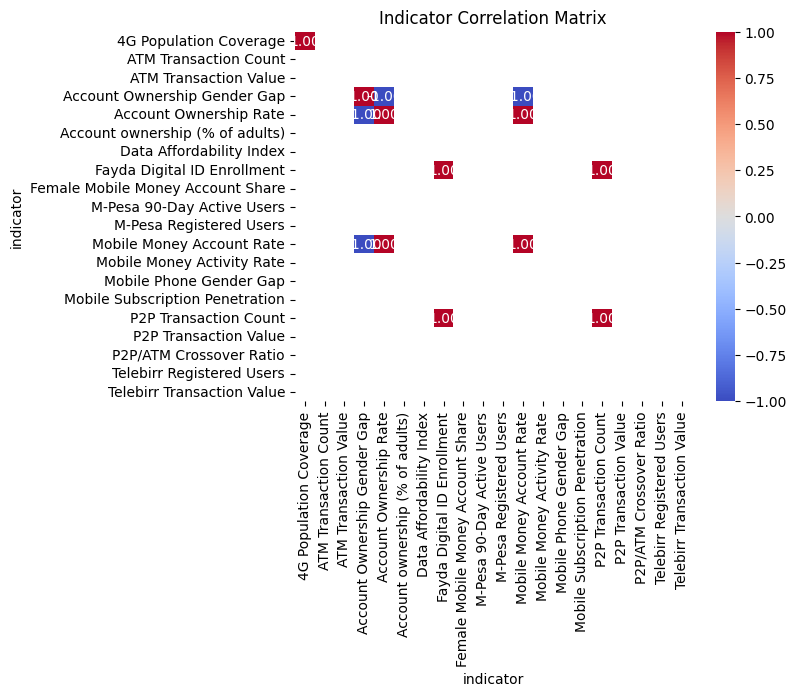

In [7]:
corr = plot_correlation_matrix(df)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Indicator Correlation Matrix")
plt.show()

insights from impact link

In [8]:
print("\n--- Insight from Impact Links ---")
links = df[df['record_type'] == 'impact_link']
print(links[['parent_id', 'related_indicator', 'impact_direction', 'lag_months']])


--- Insight from Impact Links ---
                    parent_id         related_indicator impact_direction  \
45  Banking_Proclamation_2024  Commercial Bank Branches         positive   

    lag_months  
45        12.0  


quality assessment plot

c:\Users\arwa\ethiopia-fi-forecast\notebooks\..\src\analysis_tools.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='confidence', palette='viridis',


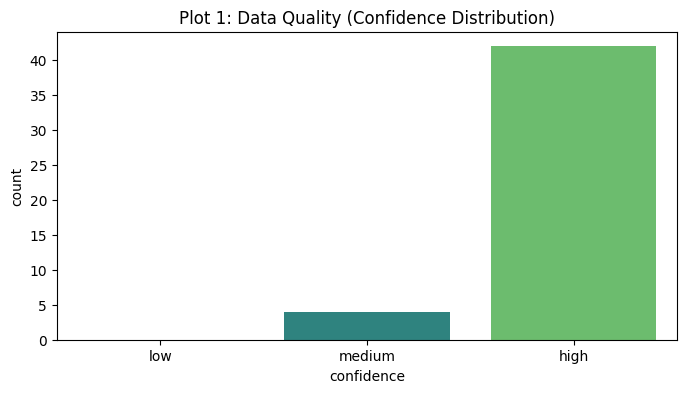

In [9]:
plot_quality_assessment(df).show()

coverage heatmap plot

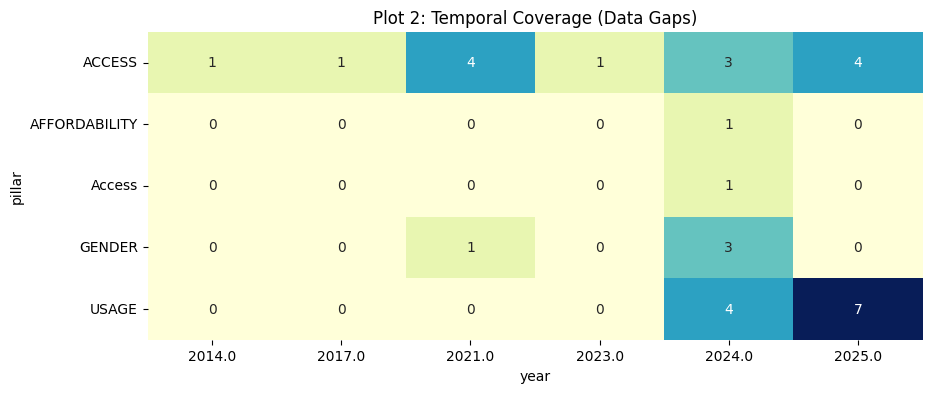

In [10]:
plot_coverage_heatmap(df).show()

access trajectory

<module 'matplotlib.pyplot' from 'c:\\Users\\arwa\\ethiopia-fi-forecast\\venv\\Lib\\site-packages\\matplotlib\\pyplot.py'>

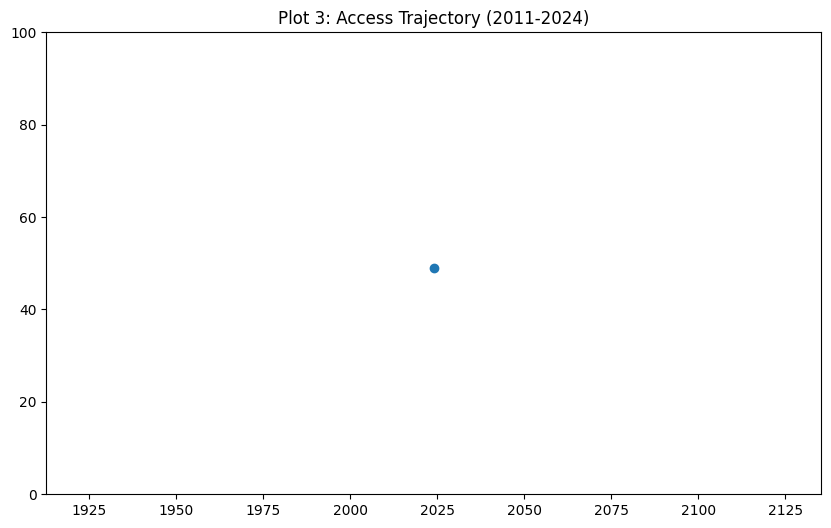

In [11]:
plot_access_trajectory(df)

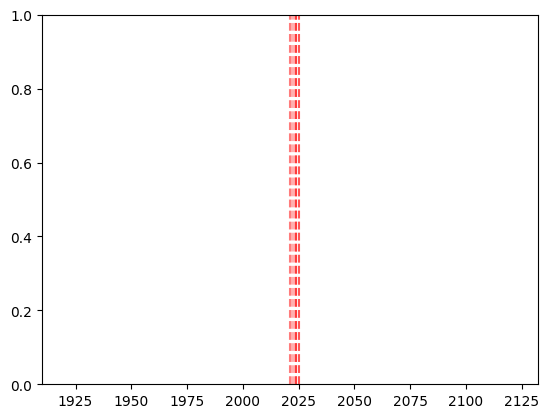

In [12]:
events = df[df['record_type'] == 'event']
for i, row in events.iterrows():
    plt.axvline(x=row['year'], color='red', linestyle='--', alpha=0.3)
plt.show()

usage gap plot

c:\Users\arwa\ethiopia-fi-forecast\notebooks\..\src\analysis_tools.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=values, palette='Reds_d')


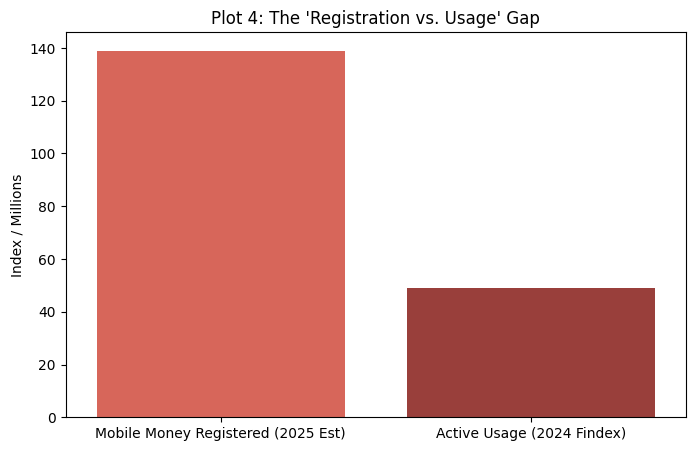

In [13]:
plot_usage_gap(df).show()

gender gap plot

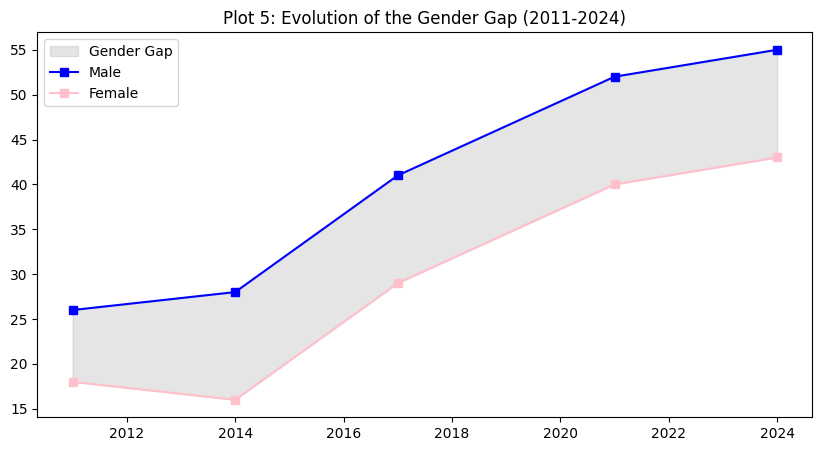

In [14]:
plot_gender_gap(df).show()